In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
import seaborn as sns

In [243]:
dataset="Alimentos.csv"
dataf= pd.read_csv(dataset)
data= dataf.values
x=data[:,:-1]
y=data[:,-1]

In [244]:
dataf.head(10)
#sns.regplot(x="Proteina_(g)", y="Energ_Kcal", data=dataf)

,Agua_(g),Proteina_(g),Lipidos_Tot_(g),Carbohitrado_(g),Fibra_TD_(g),Azucar_Tot_(g),Calcio_(mg),Hierro_(mg),Magnesio_(mg),Fosforo_(mg),Potasio_(mg),Energ_Kcal,Tasa_obesidad
0,81.24,10.45,2.27,4.76,0.0,4.00,111,0.13,9,150,125,81,9
1,82.48,12.39,1.02,2.72,0.0,2.72,61,0.14,5,134,86,72,9
2,50.01,22.17,22.35,2.19,0.0,1.03,505,0.44,20,354,76,300,3
3,48.38,21.60,24.64,2.47,0.0,1.01,575,0.20,21,412,75,318,2
4,53.78,24.26,15.92,2.77,0.0,1.13,782,0.22,23,463,84,254,2
5,71.70,11.26,12.98,3.04,0.0,0.27,207,0.38,11,158,105,174,2
6,74.41,11.39,7.91,5.14,0.0,0.31,272,0.44,15,183,125,138,8
7,87.67,3.33,3.46,4.74,0.0,0.31,128,0.05,13,97,139,63,10
8,87.73,3.33,3.40,4.74,0.0,4.74,128,0.05,13,97,139,63,2
9,65.74,3.61,12.72,17.13,0.0,17.13,90,0.04,10,86,151,194,7


El dataset tiene 508 registros, de 12 dimensiones


array([[<AxesSubplot:title={'center':'Agua_(g)'}>,
        <AxesSubplot:title={'center':'Proteina_(g)'}>,
        <AxesSubplot:title={'center':'Lipidos_Tot_(g)'}>,
        <AxesSubplot:title={'center':'Carbohitrado_(g)'}>],
       [<AxesSubplot:title={'center':'Fibra_TD_(g)'}>,
        <AxesSubplot:title={'center':'Azucar_Tot_(g)'}>,
        <AxesSubplot:title={'center':'Calcio_(mg)'}>,
        <AxesSubplot:title={'center':'Hierro_(mg)'}>],
       [<AxesSubplot:title={'center':'Magnesio_(mg)'}>,
        <AxesSubplot:title={'center':'Fosforo_(mg)'}>,
        <AxesSubplot:title={'center':'Potasio_(mg)'}>,
        <AxesSubplot:title={'center':'Energ_Kcal'}>],
       [<AxesSubplot:title={'center':'Tasa_obesidad'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

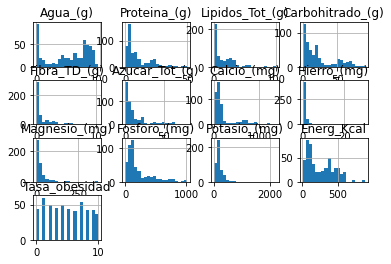

In [245]:
n,d=x.shape
print("El dataset tiene %d registros, de %d dimensiones" %(n, d))
# visualizar distribución de los datos
dataf.hist(bins=20)

In [246]:
porc_test= 0.2
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= porc_test)
print("\t %d datos para training" %x_train.shape[0])
print("\t %d datos para testing" %x_test.shape[0])

	 406 datos para training
	 102 datos para testing


In [247]:
#%% Entrenar modelo de Regresión Lineal

# Creación del objeto modelo
modelo= LinearRegression()

# Entrenar el modelo.
modelo.fit(x_train, y_train)

# Realizar predicción
y_train_predict= modelo.predict(x_train) # Con los datos de entrenamiento.
y_test_predict= modelo.predict(x_test)  # Con los datos de prueba.

# Evaluar los scores
error_train= mean_squared_error(y_train_predict, y_train)
print("Error en training: %s" % error_train)
error_test= mean_squared_error(y_test_predict, y_test)
print("Error en testing: %s" % error_test)


Error en training: 9.5446931149229
Error en testing: 9.86529218296844


In [248]:
#%% Evaluar con datos de Testing
nuevo= 25
x_nuevo=x_test[nuevo, :] # Tomamos uno de los datos.
#print(x_nuevo) # Lo miramos.
y_real= y_test[nuevo] # Tomamos la anotación real.
y_predict= modelo.predict(x_nuevo.reshape(1, -1)) # Le preguntamos al modelo su predicción.

# Comparamos.
print("\nNuevo dato:\nEl modelo predice: %f " % (y_predict) )
print("El valor real es: %f" % (y_real))


Nuevo dato:
El modelo predice: 5.128061 
El valor real es: 7.000000
